## Final Project Submission
* Student name: Kezia Setokusumo
* Student pace: Self-Paced
* Scheduled project review date/time: May 24, 2023
* Instructor name: Mark Barbour
* [Blog post](https://medium.com/@khs366/an-overview-of-common-machine-learning-models-992abdd4278a)

## Business Overview and Problem Statement
This project focuses on leveraging data from [SyriaTel](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset), a telecommunications company, to determine if a given customer will soon churn. Within a business context, churn is defined as the rate at which customers discontinue doing business with a provider over a defined period of time. Churn is a metric that companies within the telecommunications space closely track. 

Using SyriaTel's dataset and machine learning processes, the goal of this project is to identify predictable patterns that companies like SyriaTel can look for to distinguish customers that might churn. Through this, we can recommend attributes that should be addressed early on and improve the likelihood of retention.

The scope of this project includes data inspection, preprocessing, iterative modeling, final modeling, and overall evaluation.

## The Data
The dataset contains information on the telecom company's customers. Below are the descriptions of the columns representing information about each consumer:

* `state`: user's state
* `account length`: number of days the user's account has been active for
* `area code`: user's area code
* `phone number`: user's phone number
* `international plan`: true if the user has the international plan, otherwise false
* `voice mail plan`: true if the user has the voice mail plan, otherwise false
* `number vmail messages`: number of voicemails the user has sent
* `total day minutes`: call minutes during the day
* `total day calls`: number of calls during the day
* `total day charge`: amount charged to the user for day calls
* `total eve minutes`: call minutes during the evening
* `total eve calls`: number of calls during the evening
* `total eve charge`: amount charged to the user for evening calls
* `total night minutes`: call minutes during the night
* `total night calls`: number of calls during the night
* `total night charge`: amount charged to the user for night calls
* `total intl minutes`: call minutes for international calls
* `total intl calls`: number of international calls
* `total intl charge`: amount charged to the user for international calls
* `customer service calls`: number of customer service calls
* `churn`: true if the user terminated the contract, otherwise false

There are 21 columns in the dataset, and `churn` is treated as the target variable. A `churn` value of 1 means that a customer churns, while a value of 0 means the customer does not churn. The remaining 20 columns provide a glimpse into the customer's profile and usage patterns. At a glance, it appears that some of these columns have a strong relationship between one another. Some machine learning models such as logistic regressions and kNNs are impacted by multicollinearity. Hence, to account for this, we dropped one of any similar pairs in our data exploration stage.

## Methods
To classify customers into churn or no churn, we analyzed the data with several different algorithms. We built a baseline version of each algorithm:
 * Logistic Regression
 * K-Nearest Neighbors
 * Decision Trees

Afterwards, we performed iterative modeling to identify which hyperparameters work best. To select a final model, we evaluated performance based on:
* accuracy
* precision
* recall (number of true positives out of all positives)
* F1 score (a combination of recall and precision)

Though we test for all four metrics, we give some emphasis to recall, since we want to minimize false negative predictions. In this context, we want to reduce false negative predictions because we'd rather overestimate the number of churning customers versus the number of non-churning customers. Data exploration, cleaning, and preprocessing is also done during the initial stages to ensure that all models can run without error.

## Data Exploration, Cleaning, and Preprocessing

The data exploration starts with passing the information into a dataframe and previewing the first few rows, as shown below.

In [1]:
# Import relevant function(s)
import pandas as pd

# Convert the file into a dataframe
data = pd.read_csv('SyriaTel_Data.csv')
df = pd.DataFrame(data)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


We'll continue by inspecting the dataframe for any missing or null values.

In [2]:
# Check for any missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no null values in this dataset, so we'll proceed with the rest of the exploration.

Some of the columns appear to be very related, such as `total day charge` / `total day minutes` and `total intl charge` / `total intl minutes`. To avoid multicollinearity so our machine learning processes run correctly, we'll create a dataframe of correlations and drop one of the columns from any highly-correlated pairs.

In the cell below, we create a correlation heatmap to get a glimpse of any two attributes that have a strong relationship. 1 means the two columns are perfectly correlated and 0 means the two columns have no relationship.

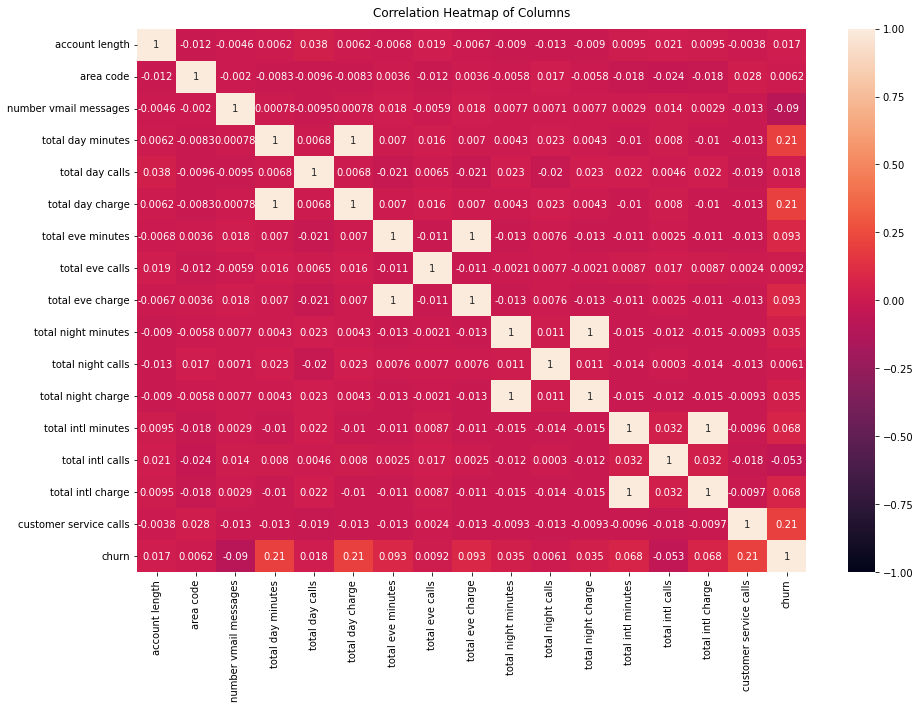

In [3]:
# Import relevant function(s)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
corr_heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
corr_heatmap.set_title('Correlation Heatmap of Columns', fontdict={'fontsize':12}, pad=12);

From the heatmap, it seems that columns with similar names such as `total intl charge` and `total intl minutes` have a perfect or nearly perfect relationship. In the cell below, we define the variable `df_corr` (a dataframe of pairs and their corresponding correlation score) and display the rows that have a value above 0.96.

In [4]:
# Define the variable 'df_corr'
df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Create a column that names the pairs
df_corr['combination'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.drop(['level_0', 'level_1'], axis=1, inplace=True)
df_corr.columns = ['corr', 'combination']

# Display the pairs that have a correlation greater than 0.96
df_corr[(df_corr['corr']<1) & (df_corr['corr']>0.96)]

,corr,combination
88,1.000000,"(total day charge, total day minutes)"
56,1.000000,"(total day minutes, total day charge)"
110,1.000000,"(total eve minutes, total eve charge)"
142,1.000000,"(total eve charge, total eve minutes)"
164,0.999999,"(total night minutes, total night charge)"
196,0.999999,"(total night charge, total night minutes)"
250,0.999993,"(total intl charge, total intl minutes)"
218,0.999993,"(total intl minutes, total intl charge)"


This dataframe shows us which combinations are highly correlated. Next, we will drop one column from each pair to avoid multicollinearity in our analysis.

In [5]:
# Based on the results from the 'df_corr' dataframe, drop thte following columns from the dataset
df = df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'], axis=1)

We've now dropped `total day minutes`, `total eve minutes`, `total night minutes`, and `total intl minutes` from the original dataframe. In the next few cells, we inspect the data type of the remaining attributes so we know which needs to be transformed.

In [6]:
# Inspect the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   


Most of the columns are in numerical form. However, the columns `state`, `phone number`, `international plan`, and `voice mail plan` are objects. Additionally, the target column `churn` is a boolean. As part of preprocessing, we will transform these columns before passing the dataframe through models.


`churn` is in boolean form, and the following cell canges the data type to binary. 0 for no churn, and 1 for churn.

In [7]:
# Target column 'churn' is in boolean form
# Change the data type to binary (False: 0, True: 1)
df['churn']=df['churn'].astype(int)

`state` is the other column that we need to transform. We'll use the `LabelEncoder` function to assign a unique number to each unique state.

In [8]:
# Import relevant function(s)
from sklearn.preprocessing import LabelEncoder

# Convert the states into numbers using LabelEncoder
le = LabelEncoder()
df['state']=le.fit_transform(df['state'])
df['state']

0       16
1       35
2       31
3       35
4       36
        ..
3328     3
3329    49
3330    39
3331     6
3332    42
Name: state, Length: 3333, dtype: int64

In [9]:
# The 'state' column can be inversed to its original form later on if needed, as shown below
le.inverse_transform(df['state'])

array(['KS', 'OH', 'NJ', ..., 'RI', 'CT', 'TN'], dtype=object)

`voice mail plan` and `international plan` are in "yes" / "no" format. We'll change these columns to binary form as well, with 0 representing no and 1 representing yes.

In [10]:
# Inspect unique values in 'voice mail plan'
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [11]:
# Inspect unique values in 'international plan'
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [12]:
# 'voice mail plan' and 'international plan' have values of 'yes' and 'no'
# Map the data in these columns so that no: 0 and yes: 1
df['voice mail plan'] = df['voice mail plan'].apply(lambda x: 0 if x=='no' else 1)
df['international plan'] = df['international plan'].apply(lambda x: 0 if x=='no' else 1)

Now that we've addressed the differences in data types, we'll make some final column drops. Previously, we dropped `total day minutes`, `total eve minutes`, `total night minutes`, and `total intl minutes` due to multicollinearity. We'll drop `phone number`, since this attribute shouldn't have any impact on churn.

In [13]:
# Logically speaking, a person's phone number should have no impact on whether they churn or not
# Drop the 'phone number' column from the dataframe
df = df.drop('phone number', axis=1)

To get a sense of what the dataframe looks like now, we'll display an updated version below.

In [14]:
# Display the current dataframe
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,49,68,415,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,39,28,510,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,6,184,510,1,0,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


Now we're left with 16 columns and 3333 rows. Using the remaining, transformed columns, we will inspect how the data is distributed for each column.

array([[<AxesSubplot:title={'center':'state'}>,
        <AxesSubplot:title={'center':'account length'}>,
        <AxesSubplot:title={'center':'area code'}>,
        <AxesSubplot:title={'center':'international plan'}>],
       [<AxesSubplot:title={'center':'voice mail plan'}>,
        <AxesSubplot:title={'center':'number vmail messages'}>,
        <AxesSubplot:title={'center':'total day calls'}>,
        <AxesSubplot:title={'center':'total day charge'}>],
       [<AxesSubplot:title={'center':'total eve calls'}>,
        <AxesSubplot:title={'center':'total eve charge'}>,
        <AxesSubplot:title={'center':'total night calls'}>,
        <AxesSubplot:title={'center':'total night charge'}>],
       [<AxesSubplot:title={'center':'total intl calls'}>,
        <AxesSubplot:title={'center':'total intl charge'}>,
        <AxesSubplot:title={'center':'customer service calls'}>,
        <AxesSubplot:title={'center':'churn'}>]], dtype=object)

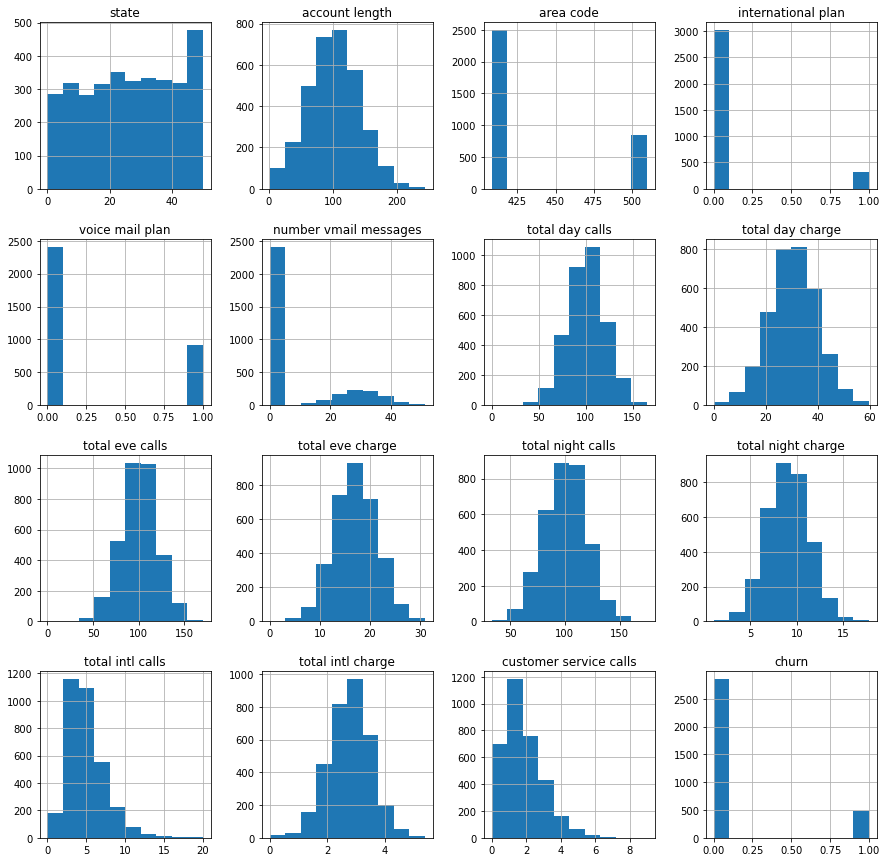

In [15]:
# Preview the data distribution of the remaining columns
df.hist(figsize=(15,15))

Most of the values for each column appear to be normally distributed, with the exception of a few columns. Note that our target variable `churn` appears to have an imbalance, which will be addressed later on in our model.

To supplement our plot of distributions for each column, we can print out the descriptive statistics for each attribute. 

In [16]:
# Preview the descriptive statistics of the remaining columns
df.describe()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,0.096910,0.276628,8.099010,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,42.371290,0.295879,0.447398,13.688365,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,0.000000,1.000000,20.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,51.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,9.000000,1.000000


The table above summarizes the central tendency, dispersion, and overall shape of our dataset's distribution. This will be helpful in our recommendation stage, once we identify the most influential factors for churn.

As previously mentioned, our target variable appears to have an imbalance. To get an idea of the current proportions, we'll calculate how many rows represent no churn versus churn.

In [17]:
# Print out the value counts of 'churn' to get an idea of the current class proportions
print(df['churn'].value_counts())
print('\n')
print('Current churn rate:', round((df['churn'].value_counts()[1]/len(df))*100,2),'%')

0    2850
1     483
Name: churn, dtype: int64


Current churn rate: 14.49 %


There's a significant class imbalance with the current dataset, considering that only 14.49% of the data is for customers with churn. We will run a logistic regression model as usual before adjusting for the class imbalance.

## Logistic Regression Model

In the following cells, we pass the data through a `train_test_split` and create a baseline logistic regression model to assess performance. We adjust the data for any errors as we go.

In [18]:
# Import relevant function(s)
from sklearn.model_selection import train_test_split

# Split the dataframe into X and y
X = df.drop('churn', axis=1)
y = df['churn']

# Perform a train-test-split with random_state set to 42 and stratify set to y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

We passed the argument `stratify=y` to the `train_test_split` so there are roughly equal percentages of no churn versus churn data for the testing and training data. We can confirm the results below.

In [19]:
# Check that there are roughly equal percentages of no churn and churn data for the testing and training sets
print('Training set value counts')
print(y_train.value_counts(normalize=True))
print('\n')
print('Testing set value counts')
print(y_test.value_counts(normalize=True))

Training set value counts
0    0.855142
1    0.144858
Name: churn, dtype: float64


Testing set value counts
0    0.854916
1    0.145084
Name: churn, dtype: float64


After passing the data through a `train_test_split`, we can instantiate a `LogisticRegression` model. In the cell below, we import all the relevant functions, create a baseline model with suppressed warnings, and evalute the baseline against accuracy, precision, recall, and F1.

In [20]:
# Import relevant function(s)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import warnings

# Instantiate a LogisticRegression
logreg = LogisticRegression(random_state=42)
warnings.filterwarnings('ignore') # This line is added to remove the large convergence warning we would get

# Evaluate the baseline logistic regression model based on accuracy using cross_val_score
# We use the training data in this case
print('Accuracy:', cross_val_score(logreg, X_train, y_train, scoring='accuracy').mean())
print('Precision:', cross_val_score(logreg, X_train, y_train, scoring='precision').mean())
print('Recall:', cross_val_score(logreg, X_train, y_train, scoring='recall').mean())
print('F1:', cross_val_score(logreg, X_train, y_train, scoring='f1').mean())

Accuracy: 0.8551398797595191
Precision: 0.4966633366633366
Recall: 0.08554033485540333
F1: 0.1456832922150185


The baseline logistic regression model returns an accuracy of 0.855, which is quite good for a first run. However, there's a convergence warning, and the model performs poorly for every other metric. We disabled the display of the convergence warning for ease of readability. To address this issue, we need to change the hyperparameters and scale the data appropriately. In the following lines of code, we use standard scaler to scale the numbers and `SMOTE` to address the data imbalance that was identified earlier.

In [21]:
# Import relevant function(s)
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Resample the training data and convert to a dataframe
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_train_xm = pd.DataFrame(X_train_sm, columns = X_train.columns)

The cell below confirms that we successfully resampled the training dataset.

In [22]:
# Check the value counts of y_train_sm to ensure that SMOTE worked as expected
y_train_sm.value_counts()

0    2137
1    2137
Name: churn, dtype: int64

Once we resample with `SMOTE`, we can scale the numbers with `StandardScaler`. To reiterate, we had a convergence warning since the data was not standardized. Additionally, we observed during our data exploration stage that some of the columns are recorded with different scales.

In [23]:
# Import relevant function(s)
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler
scaler = StandardScaler()

# Fit onto the resampled data X_train_sm and scale/transform
scaler.fit(X_train_sm)
X_train_sm_scaled = scaler.transform(X_train_sm)

# Instantiate a logistic regression with increased 'max_iter'
logreg_sm = LogisticRegression(max_iter = 1000, random_state = 42)

# Evaluate the logistic regression and print the results
logreg_sm_acc=cross_val_score(logreg_sm, X_train_sm_scaled, y_train_sm, scoring = 'accuracy').mean()
logreg_sm_prec=cross_val_score(logreg_sm, X_train_sm_scaled, y_train_sm, scoring = 'precision').mean()
logreg_sm_rec=cross_val_score(logreg_sm, X_train_sm_scaled, y_train_sm, scoring = 'recall').mean()
logreg_sm_f1=cross_val_score(logreg_sm, X_train_sm_scaled, y_train_sm, scoring = 'f1').mean()

print('Accuracy:', logreg_sm_acc)
print('Precision:', logreg_sm_prec)
print('Recall:', logreg_sm_rec)
print('F1:', logreg_sm_f1)

Accuracy: 0.7173603407425668
Precision: 0.7103194532589077
Recall: 0.7342193963536081
F1: 0.7220523654041442


After resampling, increasing maximum iterations, and scaling the data, we no longer get a convergence warning from the logistic regression model. Despite our accuracy score decreasing slightly from 0.855 to 0.717, our precision, recall, and F1 scores have improved. To continue, we will build a baseline kNN model to see how it compares to the logistic regression.

## K-Nearest Neighbors (kNN) Model
A baseline kNN model is created and tested for accuracy, as shown below. We start by scaling the data, similar to what we did when creating a logistic regression.

In [24]:
# Instantiate a StandardScaler
scaler = StandardScaler()

# Scale the datasets
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.transform(X_test)

Now we can import the `KNeighborsClassifier` and instantiate a kNN. The model is fitted on the scaled training data and initially evaluated for accuracy.

In [25]:
# Import relevant function(s)
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier
clf = KNeighborsClassifier()

# Build a baseline kNN model
knn_baseline = clf.fit(scaled_Xtrain, y_train)

# Evaluate the kNN baseline model with 'cross_val_score'
knn_baseline_cv = cross_val_score(knn_baseline, scaled_Xtrain, y_train, scoring = 'accuracy').mean()
knn_baseline_cv

0.8823478957915831

The baseline kNN model has a higher accuracy compared to the corrected baseline logistic regression model, improving from 0.717 to 0.882. To further test the kNN model under different scenarios, we will conduct an iterative modeling process to identify the best hyperparameters to include. The following lines of code create a loop to find the `n_neighbors` value that returns the highest accuracy.

In [26]:
# Import relevant function(s)
import numpy as np

# Create an empty list to store the accuracy scores
acc_scores=[]

# Create a 'for' loop as part of an iterative process to find the best 'n_neighbor' value
for num in np.arange(5,50,5):
    clf = KNeighborsClassifier(n_neighbors=num)
    clf.fit(scaled_Xtrain, y_train)
    knn_acc = cross_val_score(clf, scaled_Xtrain, y_train, scoring='accuracy').mean()
    acc_scores.append((knn_acc, num))
acc_scores

[(0.8823478957915831, 5),
 (0.869545490981964, 10),
 (0.8687446893787575, 15),
 (0.8615414829659318, 20),
 (0.8635406813627254, 25),
 (0.8603414829659318, 30),
 (0.8607414829659319, 35),
 (0.8583414829659318, 40),
 (0.8579414829659319, 45)]

The cell above returns a list of accuracy scores for each value of `n_neighbors`. Using the `max()` function, we'll print out the highest score recorded and its `n_neighbors` value.

In [27]:
# Print the highest accuracy score recorded and the corresponding 'n_neighbor'
print('highest accuracy score and corresponding n_neighbor:')
max(acc_scores)

highest accuracy score and corresponding n_neighbor:


(0.8823478957915831, 5)

Now we know that `n_neighbors=5` results in the best accuracy score. We will repeat the process above with this value of `n_neighbors` and print out the evaluation metrics.

In [28]:
# Import relevant function(s)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate another KNeighborsClassifier with n_neighbors=5,
# since n_neighbors=5 resulted in the highest accuracy as shown from the previous run
kNN_2 = KNeighborsClassifier(n_neighbors = 5)
kNN_2.fit(scaled_Xtrain, y_train)
y_pred = kNN_2.predict(scaled_Xtest)

# Print out evaluation metrics
print('Accuracy:', round(accuracy_score(y_test, y_pred),2))
print('Precision:', round(precision_score(y_test, y_pred),2))
print('Recall:', round(recall_score(y_test, y_pred),2))
print('F1:', round(f1_score(y_test, y_pred),2))

Accuracy: 0.88
Precision: 0.7
Recall: 0.33
F1: 0.45


The scores for recall and F1 are significantly lower than the accuracy score. Given this business case, it would be worse to have more false negatives (customers who actually churn but are predicted to not churn) than false positives (customers who actually do not churn but are predicted to churn). Considering that we want to minimize false negatives, we will see if we can improve the recall score. To do this, we will use `GridSearchCV` to find the combination of several hyperparameters, not just `n_neighbors`, that results in the best possible model. It's important to note that there's a tradeoff between recall and precision, so increasing one will reduce the other.

In [29]:
# Import relevant function(s)
from sklearn.model_selection import GridSearchCV

# Instantiate a KNeighborsClassifier
kNN = KNeighborsClassifier()

# Define the grid parameter for GridSearchCV
grid = {'n_neighbors': np.arange(1, 50, 2),
         'weights': ['uniform', 'distance'],
         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size': np.arange(30,50,2)}

# Define the gridsearch for the kNN model
kNN_gridsearch = GridSearchCV(kNN, grid, cv=5, scoring='accuracy')
kNN_gridsearch.fit(scaled_Xtrain, y_train)

# Print the best combination that results in the highest accuracy score
print("Optimal combination:", kNN_gridsearch.best_params_)

Optimal combination: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 3, 'weights': 'uniform'}


Using `best_params_`, we can get the ideal combination of hyperparameters that the model looped through with `GridSearchCV`. Now, we can define a `kNN_best` and evaluate its performance with a classification report.

In [30]:
# Define 'kNN_best' using the best parameters returned
kNN_best = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, n_neighbors = 3, weights = 'uniform')
kNN_best.fit(scaled_Xtrain, y_train)

# Define predicted values using the testing set
y_pred = kNN_best.predict(scaled_Xtest)

# Evaluate the kNN and print the results
kNN_acc = round(accuracy_score(y_test, y_pred),2)
kNN_prec = round(precision_score(y_test, y_pred),2)
kNN_rec = round(recall_score(y_test, y_pred),2)
kNN_f1 = round(f1_score(y_test, y_pred),2)

print('Accuracy:', kNN_acc)
print('Precision:', kNN_prec)
print('Recall:', kNN_rec)
print('F1:', kNN_f1)

# Display the results in a classification report
target_names = ['no churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.88
Precision: 0.64
Recall: 0.32
F1: 0.43
              precision    recall  f1-score   support

    no churn       0.89      0.97      0.93       713
       churn       0.64      0.32      0.43       121

    accuracy                           0.88       834
   macro avg       0.77      0.65      0.68       834
weighted avg       0.86      0.88      0.86       834



In this run, the kNN model actually performs worse than the baseline, suggesting that we should try a different approach. We will repeat the iterative processes from before on a `DecisionTreeClassifier` and compare its performance to the kNN and logistic regression models.

## Decision Tree Model
A baseline decision tree model is created and tested for accuracy, as shown below.

In [54]:
# Import relevant function(s)
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier for the baseline model
dt_baseline = DecisionTreeClassifier()
dt_baseline.fit(X_train, y_train)

# Return the accuracy of 'dt_baseline'
cross_val_score(dt_baseline, X_train, y_train, scoring='accuracy').mean()

0.9183679358717436

The baseline model's accuracy of 0.918 indicates that the decision tree might produce the best result. To start looping through several iterations, we'll first adjust the `max_depth` values to see if we can get a higher accuracy and improved metrics.

In [55]:
# Create an empty list to store the accuracy scores for each loop and the corresponding 'max_depth' value
dtree_scores=[]
for depth in np.arange(1,10,1):
    dt = DecisionTreeClassifier(random_state=42, max_depth = depth)
    dt_acc = cross_val_score(dt, X_train, y_train, scoring='accuracy').mean()
    dtree_scores.append((dt_acc, depth))
dtree_scores

[(0.8639398797595191, 1),
 (0.8839551102204408, 2),
 (0.9051599198396794, 3),
 (0.9247679358717436, 4),
 (0.9415743486973949, 5),
 (0.9463775551102204, 6),
 (0.9443727454909819, 7),
 (0.945172745490982, 8),
 (0.9423727454909819, 9)]

Similar to the n_neighbors loop that we ran for the kNN model, we return several accuracy values corresponding to different `max_depth` values within a DecisionTreeClassifier. The cell below uses the `max()` function to print out the highest score and its `max_depth`.

In [56]:
# Return the 'max_depth' value that results in the highest accuracy
print('highest accuracy score and corresponding max_depth:')
max(dtree_scores)

highest accuracy score and corresponding max_depth:


(0.9463775551102204, 6)

Now we know that `max_depth=6` results in the best accuracy score. We will repeat the process above with this value of `max_depth` and print out the evaluation metrics.

In [57]:
# Define another decision tree for the best accuracy with 'max_depth' set to 6
dt_best_acc = DecisionTreeClassifier(random_state = 42, max_depth = 6)
dt_best_acc.fit(X_train, y_train)
y_pred = dt_best_acc.predict(X_test)

# Print out the evaluation metrics for 'dt_best_acc'
print('Accuracy:', round(accuracy_score(y_test, y_pred),2))
print('Precision:', round(precision_score(y_test, y_pred),2))
print('Recall:', round(recall_score(y_test, y_pred),2))
print('F1:', round(f1_score(y_test, y_pred),2))

Accuracy: 0.93
Precision: 0.81
Recall: 0.64
F1: 0.71


On our first loop of the `DecisionTreeClassifier`, we can see that all the evaluation metrics have already increased. To confirm that that the hyperparameters we're using are ideal, we'll perform another `GridSearchCV` similar to the one done on the kNN model.

In [58]:
# Import relevant function(s)
from sklearn.model_selection import GridSearchCV

# Instantiate another decision tree and define the grid for 'GridSearchCV'
tree = DecisionTreeClassifier()
grid = {'max_depth': np.arange(1, 21, 1),
         'min_samples_split': np.arange(2, 11, 2),
         'min_samples_leaf': np.arange(1, 6),
         'criterion': ['gini', 'entropy']}

# Define the gridsearch for the decision tree and fit it on the training set
tree_gridsearch = GridSearchCV(tree, grid, cv=5, scoring='accuracy')
tree_gridsearch.fit(X_train, y_train)

# Print the combination that results in the highest accuracy score
print("Optimal combination:", tree_gridsearch.best_params_)

Optimal combination: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6}


Like before, we use `best_params_` to return the ideal combination of hyperparameters from what we tested for in `GridSearchCV`. We can print out the evaluation metrics in a classification report for this decision tree.

In [59]:
# Define 'dtree_best' using the best parameters returned
dtree_best = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 2, min_samples_split = 6)
dtree_best.fit(X_train, y_train)
y_pred = dtree_best.predict(X_test)
print('Accuracy:', round(accuracy_score(y_test, y_pred),2))
print('Precision:', round(precision_score(y_test, y_pred),2))
print('Recall:', round(recall_score(y_test, y_pred),2))
print('F1:', round(f1_score(y_test, y_pred),2))

# Display the results in a classification report
target_names = ['no churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.94
Precision: 0.88
Recall: 0.67
F1: 0.76
              precision    recall  f1-score   support

    no churn       0.95      0.98      0.96       713
       churn       0.88      0.67      0.76       121

    accuracy                           0.94       834
   macro avg       0.91      0.83      0.86       834
weighted avg       0.94      0.94      0.94       834



So far, the evaluation metrics for the DecisionTreeClassifier are the best among all the models we've built. Currently, recall score is the lowest among accuracy, precision, recall, and F1. To reiterate, we want to emphasize improving the model's recall because we're aiming to reduce false negatives. We've been scoring based on accuracy up until now, since accuracy is commonly understood by the general public. For this next and final run, we'll change the scoring parameter within `GridSearchCV` to "recall" and keep all else equal.

In [60]:
# Instantiate another decision tree and define the grid for 'GridSearchCV'
tree = DecisionTreeClassifier()
grid = {'max_depth': np.arange(1, 21, 1),
         'min_samples_split': np.arange(2, 11, 2),
         'min_samples_leaf': np.arange(1, 6),
         'criterion': ['gini', 'entropy']}

# Define the gridsearch for the decision tree and fit it on the training set
# Set the 'scoring' parameter to 'recall' this time
tree_gridsearch2 = GridSearchCV(tree, grid, cv=5, scoring='recall')
tree_gridsearch2.fit(X_train, y_train)
print("Optimal combination:", tree_gridsearch2.best_params_)

Optimal combination: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}


Once again, we used `best_params_` to get the best combination of parameters after tuning the model to maximize recall. We define another decision tree called `dtree_best2` and create a second classification report below.

In [61]:
# Define 'dtree_best2' using the best parameters returned
dtree_best2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 13, min_samples_leaf = 1, min_samples_split = 2)
dtree_best2.fit(X_train, y_train)
y_pred = dtree_best2.predict(X_test)

# Evaluate the decision tree and print the results
dtree_acc = round(accuracy_score(y_test, y_pred),2)
dtree_prec = round(precision_score(y_test, y_pred),2)
dtree_rec = round(recall_score(y_test, y_pred),2)
dtree_f1 = round(f1_score(y_test, y_pred),2)
print('Accuracy:', dtree_acc)
print('Precision:', dtree_prec)
print('Recall:', dtree_rec)
print('F1:', dtree_f1)

# Display the results in a classification report
target_names = ['no churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.92
Precision: 0.75
Recall: 0.7
F1: 0.73
              precision    recall  f1-score   support

    no churn       0.95      0.96      0.96       713
       churn       0.75      0.70      0.73       121

    accuracy                           0.92       834
   macro avg       0.85      0.83      0.84       834
weighted avg       0.92      0.92      0.92       834



Though accuracy and precision have fallen slightly, our recall score has increased from 0.67 to 0.70. Given the context of the business problem, we'll use this version of the `DecisionTreeClassifier` to plot a confusion matrix and define the final model.

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

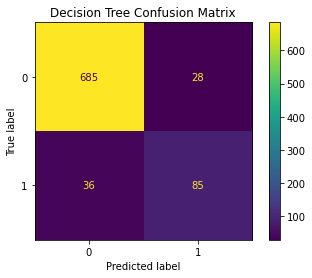

In [62]:
# Import relevant function(s)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the confusion matrix and create a display
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
disp.ax_.set_title("Decision Tree Confusion Matrix")

Based on the confusion matrix, our decision tree model has around 36 false negatives, corresponding to a recall score of 70%. Though it's not extremely high, the decision tree produces the highest recall score thus far and performs relatively well on other fronts. The model has a high accuracy of 92%, a precision of 75%, and an F1 (combination of recall and precision) of 73%. We can now set the decision tree with its tuned hyperparameters as our final model.

## Final Model and Feature Importances
To summarize all the algorithms that we've tested so far, below is a summary table showing the evaluation metrics that correspond to the best run of each model.

In [63]:
# Store all the information inside a list called 'summary_data'
summary_data = [['Logistic Regression', logreg_sm_acc, logreg_sm_prec, logreg_sm_rec, logreg_sm_f1], ['kNN', kNN_acc, kNN_prec, kNN_rec, kNN_f1], ['Decision Tree', dtree_acc, dtree_prec, dtree_rec, dtree_f1]]

# Pass everything through a dataframe called 'summary'
summary = pd.DataFrame(summary_data, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
summary = round(summary, 2)
summary.set_index('Model', inplace=True)

# Display the table
summary

,Accuracy,Precision,Recall,F1
Model,,,,
Logistic Regression,0.72,0.71,0.73,0.72
kNN,0.88,0.64,0.32,0.43
Decision Tree,0.92,0.75,0.70,0.73


The summary table indicates that a decision tree is the best algorithm to use. Though it has a slightly lower recall score than that of the logistic regression, the decision tree model is still substantially more accurate and precise than the logistic regression.

Now that we've determined the highest performing iteration from each algorithm, we'll instantiate a `final_model` variable with the best hyperparameters. We'll print out its accuracy, precision, recall, and F1 as well.

In [69]:
# Define the final_model variable to be the DecisionTreeClassifier
final_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 13, min_samples_leaf = 1, min_samples_split = 2)
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)

# Display the evaluation metrics
print('Accuracy:', round(accuracy_score(y_test, pred),2))
print('Precision:', round(precision_score(y_test, pred),2))
print('Recall:', round(recall_score(y_test, pred),2))
print('F1:', round(f1_score(y_test, pred),2))

Accuracy: 0.92
Precision: 0.75
Recall: 0.7
F1: 0.72


Using our `final_model`, we can discern which inputs are the most relevant for predicting if a customer will churn. To do this, we use the fitted attribute `feature_importances_`. The results are visualized below.

Text(0.5, 1.0, "Decision Tree Classifier: Feature Importance for SyriaTel's Dataset")

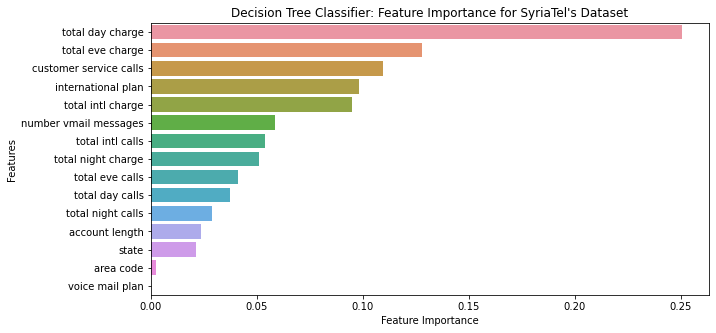

In [70]:
# Define figure and axes
fig, ax = plt.subplots(figsize = (10, 5))

# Define feature importances and plot the results for visualization
final_fi = pd.Series(final_model.feature_importances_, index = X.columns).sort_values(ascending=False)
sns.barplot(ax = ax, x = final_fi, y = final_fi.index)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features')
ax.set_title("Decision Tree Classifier: Feature Importance for SyriaTel's Dataset")

Our graph of feature importances shows that `total day charge`, `total eve charge`, and `customer service calls` are the most pertinent variables for predicting customer churn.

## Conclusion and Final Recommendations
After using several algorithms and conducting iterative processes for each, we've determined that a DecisionTreeClassifier with the following parameters returns predictions with the best evaluation metrics:

`DecisionTreeClassifier(criterion = 'entropy', max_depth = 13, min_samples_leaf = 1, min_samples_split = 2)`

Instantiating a DecisionTreeClassifier with the tuned hyperparameters results in:

In [71]:
print('Accuracy:', dtree_acc)
print('Precision:', dtree_prec)
print('Recall:', dtree_rec)
print('F1:', dtree_f1)

Accuracy: 0.92
Precision: 0.75
Recall: 0.7
F1: 0.73


By looking at the testing data's evaluation metrics and the confusion matrix produced, we can conclude that this model results in the least number of false negatives, which is what we want to minimize in this context. When we use this decision tree model to map out the most influential features on determining customer churn, we find that the most important attributes are:

* `total day charge`
* `total eve charge`
* `customer service calls`

Overall, we can conclude that customer churn is highly dependent on how much a client is currently paying in phone bills and how often they experience issues requiring customer service. From our data exploration stage, it shows that the 75th percentile for `total day charge`, `total eve charge`, and `customer service calls` are \\$ 37, \\$ 20, and 2 calls, respectively. Knowing this, SyriaTel can implement some strategies to increase brand loyalty and raise retention rates for customers ranging near these numbers:

* Added value: Once consumers start paying above a certain threshold, SyriaTel should offer discounts on other services such as internet or entertainment.

* Rewards programs: Research has demonstrated that rewards for loyalty enables businesses to charge higher without as much churn.

* Omnichannel support: SyriaTel can ensure its team is well-equipped to handle requests to create a stress-free process and readily-available help.

* Price transparency: Consumers often lose sight of what they're paying for. When bills get too high, they can easily swap out for a cheaper service without knowing what they're losing out on. SyriaTel should provide a clear breakdown of every bill and use terms easily understood by the public.

## Further Analyses
* Compare churn data with that of competitors to see how SyriaTel's business fares in comparison
* Implement customer retention strategies incrementally, and repeat the same analysis to decide which course of action is the most effective
* Dive deeper into price analysis so SyriaTel can estimate the highest price they can charge customers without resulting in churns and pinpoint factors that determine a client's price sensitivity

## Contact Information
* E-mail: kezia.setokusumo@stern.nyu.edu
* [Github](https://github.com/keziasetokusumo)
* [LinkedIn](https://linkedin.com/in/keziasetokusumo/)